In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\97455\\Downloads\\metacritic_reviews.csv")
df.head()

,publisher,author,metacritic_rating,metascore,metacritic_id
0,L.A. Weekly,Paul Malcolm,80.0,35.0,movie/ghosts-of-mars
1,New Times (L.A.),Gregory Weinkauf,80.0,35.0,movie/ghosts-of-mars
2,Chicago Sun-Times,Roger Ebert,75.0,35.0,movie/ghosts-of-mars
3,Chicago Tribune,Michael Wilmington,63.0,35.0,movie/ghosts-of-mars
4,Salon,Andrew O'Hehir,60.0,35.0,movie/ghosts-of-mars


In [4]:
cmu = pd.read_csv("C:\\Users\\97455\\Downloads\\cmu_movies_augmented.csv")
cmu.head()

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3


In [5]:
from ast import literal_eval

# Function to convert string to dictionary
def string_to_dict(column_string):
    try:
        return literal_eval(column_string)
    except ValueError:
        return {}

# Function to get the first value from a dictionary
def get_first_value_from_dict(column_data):
    if isinstance(column_data, dict) and len(column_data) > 0:
        return next(iter(column_data.values()))
    return None

# Convert string representations of dictionaries to actual dictionaries
cmu['languages'] = cmu['languages'].apply(string_to_dict)
cmu['countries'] = cmu['countries'].apply(string_to_dict)
cmu['genres'] = cmu['genres'].apply(string_to_dict)

# Extract the first value for language, country, and genre
cmu['first_language'] = cmu['languages'].apply(get_first_value_from_dict)
cmu['first_country'] = cmu['countries'].apply(get_first_value_from_dict)
cmu['first_genre'] = cmu['genres'].apply(get_first_value_from_dict)

# Check the results
print(cmu[['first_language', 'first_country', 'first_genre']].head())


     first_language             first_country        first_genre
0  English Language  United States of America           Thriller
1  English Language            United Kingdom      Costume drama
2  English Language  United States of America  Children's/Family
3  English Language  United States of America           Thriller
4              None  United States of America    Romantic comedy


In [6]:
#merge both datasets
merged_df = pd.merge(df, cmu, on='metacritic_id', how='inner')

# Check the merged dataset
merged_df.head()

,publisher,author,metacritic_rating,metascore_x,metacritic_id,wikipedia_id,freebase_id,name,revenue,runtime,...,release_date_datetime,imdb_id,imdb_rating,imdb_votes,metascore_y,count_nomination,count_award,first_language,first_country,first_genre
0,L.A. Weekly,Paul Malcolm,80.0,35.0,movie/ghosts-of-mars,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,...,2001-08-24,tt0228333,4.9,56930.0,35.0,2,0,English Language,United States of America,Thriller
1,New Times (L.A.),Gregory Weinkauf,80.0,35.0,movie/ghosts-of-mars,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,...,2001-08-24,tt0228333,4.9,56930.0,35.0,2,0,English Language,United States of America,Thriller
2,Chicago Sun-Times,Roger Ebert,75.0,35.0,movie/ghosts-of-mars,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,...,2001-08-24,tt0228333,4.9,56930.0,35.0,2,0,English Language,United States of America,Thriller
3,Chicago Tribune,Michael Wilmington,63.0,35.0,movie/ghosts-of-mars,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,...,2001-08-24,tt0228333,4.9,56930.0,35.0,2,0,English Language,United States of America,Thriller
4,Salon,Andrew O'Hehir,60.0,35.0,movie/ghosts-of-mars,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,...,2001-08-24,tt0228333,4.9,56930.0,35.0,2,0,English Language,United States of America,Thriller


In [7]:
# Group by critic and aggregate their ratings and awards
critic_agg = merged_df.groupby('author').agg({'metacritic_rating': 'mean', 'count_award': 'sum'}).reset_index()
critic_agg.head()

,author,metacritic_rating,count_award
0,007FilmReviewer,10.000000,2
1,30Cents,1.000000,1
2,311433,6.000000,62
3,40mangunshot,9.000000,0
4,A.A. Dowd,69.206897,1268


In [8]:
#descriptive analysis
critic_agg[['metacritic_rating', 'count_award']].describe()

,metacritic_rating,count_award
count,1367.000000,1367.000000
mean,38.854582,793.952451
std,30.569343,2729.254209
min,0.000000,0.000000
25%,8.000000,4.000000
50%,49.795699,26.000000
75%,64.691718,180.000000
max,100.000000,33071.000000


In [9]:
#correlation analysis
correlation = critic_agg[['metacritic_rating', 'count_award']].corr()
print(correlation)


                   metacritic_rating  count_award
metacritic_rating           1.000000     0.228005
count_award                 0.228005     1.000000


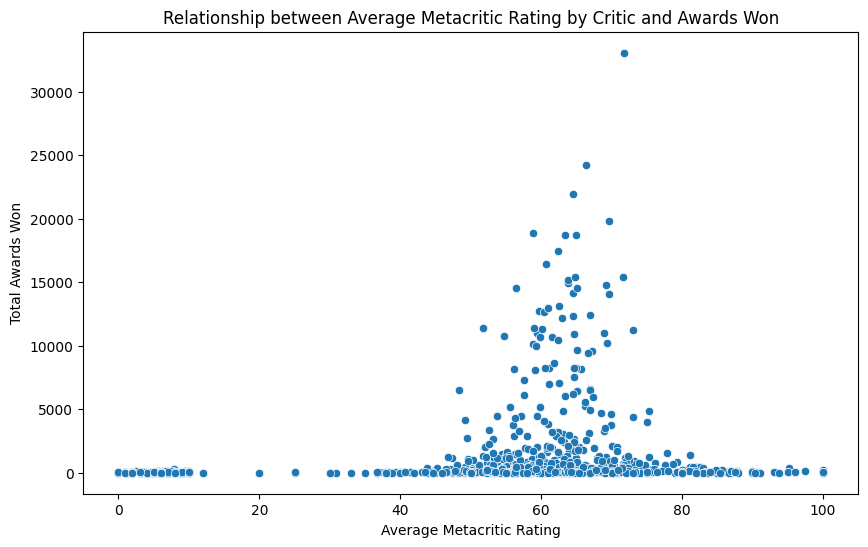

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='metacritic_rating', y='count_award', data=critic_agg)
plt.title('Relationship between Average Metacritic Rating by Critic and Awards Won')
plt.xlabel('Average Metacritic Rating')
plt.ylabel('Total Awards Won')
plt.show()


In [11]:
#Statistical Testing
import statsmodels.api as sm

# Linear regression
X = sm.add_constant(critic_agg['metacritic_rating'])  # adding a constant
y = critic_agg['count_award']
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            count_award   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     74.85
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.40e-17
Time:                        17:42:24   Log-Likelihood:                -12718.
No. Observations:                1367   AIC:                         2.544e+04
Df Residuals:                    1365   BIC:                         2.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.0116    116.30

The metacritic rating seems to have a statistically significant effect on the number of awards a film wins.

However, the effect size is relatively small (as indicated by the low R-squared value), meaning that while there is a relationship, metacritic ratings alone do not strongly predict the number of awards.

The model's validity might be impacted by the non-normal distribution of residuals, suggesting that further investigation or a different model specification could be warranted.

In [12]:
df_one_hot = merged_df.copy()

# Perform one-hot encoding for the 'first_language' column
one_hot_encoded_languages = pd.get_dummies(df_one_hot['first_genre'], prefix='genre')

# Joining the one-hot encoded columns back to the original DataFrame
df_encoded = df_one_hot.join(one_hot_encoded_languages)

# Displaying the first few rows of the new DataFrame to verify the one-hot encoding
print(df_encoded.head())

           publisher              author  metacritic_rating  metascore_x  \
0        L.A. Weekly        Paul Malcolm               80.0         35.0   
1   New Times (L.A.)    Gregory Weinkauf               80.0         35.0   
2  Chicago Sun-Times         Roger Ebert               75.0         35.0   
3    Chicago Tribune  Michael Wilmington               63.0         35.0   
4              Salon      Andrew O'Hehir               60.0         35.0   

          metacritic_id  wikipedia_id freebase_id            name     revenue  \
0  movie/ghosts-of-mars        975900   /m/03vyhn  Ghosts of Mars  14010832.0   
1  movie/ghosts-of-mars        975900   /m/03vyhn  Ghosts of Mars  14010832.0   
2  movie/ghosts-of-mars        975900   /m/03vyhn  Ghosts of Mars  14010832.0   
3  movie/ghosts-of-mars        975900   /m/03vyhn  Ghosts of Mars  14010832.0   
4  movie/ghosts-of-mars        975900   /m/03vyhn  Ghosts of Mars  14010832.0   

   runtime  ... genre_Time travel genre_Tragedy genre_Tr

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols



# Selecting the independent variables (one-hot encoded languages)
X = df_encoded.filter(like='genre_')  

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Selecting the dependent variable
y = df_encoded['metacritic_rating']  # Replace 'imdb_rating' with your dependent variable

# Fit the OLS model
model = sm.OLS(y, X, missing='drop').fit()  # 'missing='drop'' will drop any rows with missing values

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      metacritic_rating   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     49.34
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:42:30   Log-Likelihood:            -7.1353e+05
No. Observations:              158549   AIC:                         1.427e+06
Df Residuals:                  158358   BIC:                         1.429e+06
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

const                     0.000000e+00
genre_Absurdism           1.248778e-02
genre_Action Thrillers    4.369363e-02
genre_Adult               3.560502e-02
genre_Adventure           4.504514e-08
                              ...     
genre_War film            1.147984e-27
genre_Western             4.160065e-13
genre_Workplace Comedy    1.740095e-02
genre_World cinema        5.554511e-35
genre_Wuxia               1.384805e-10
Length: 126, dtype: float64


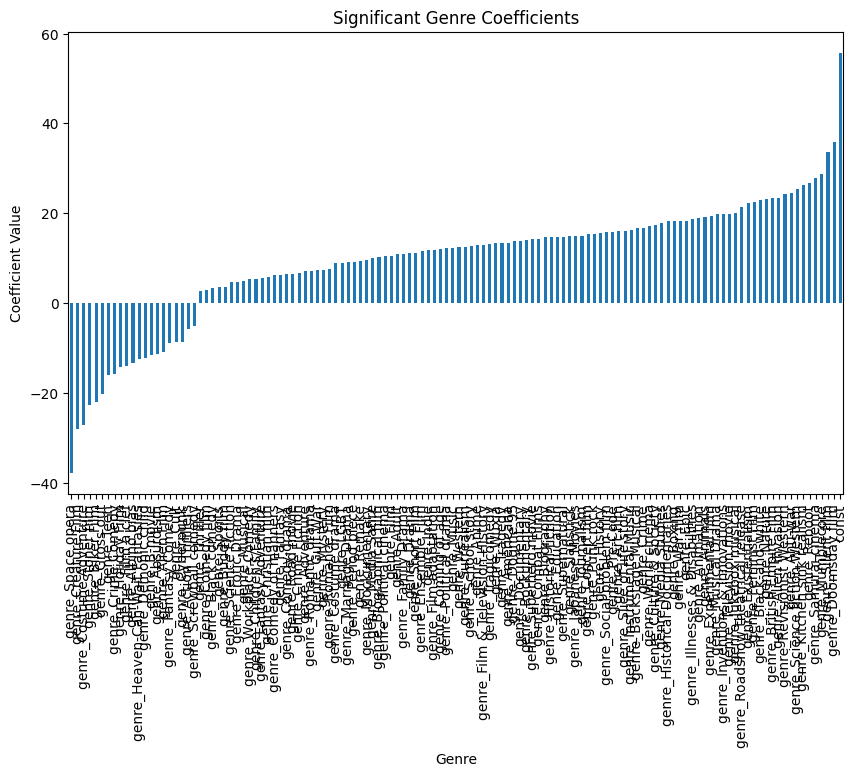

In [14]:
# Assuming 'results' is the fitted OLS model from statsmodels
significant_genres = model.pvalues[model.pvalues < 0.05]

# Print the significant genre coefficients
print(significant_genres)

# Optional: Plot the significant coefficients for visual representation
significant_coef = model.params[model.pvalues < 0.05]
plt.figure(figsize=(10, 6))
significant_coef.sort_values().plot(kind='bar')
plt.title('Significant Genre Coefficients')
plt.xlabel('Genre')
plt.ylabel('Coefficient Value')
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df is your DataFrame with 'metacritic_rating' and 'first_genre' columns

# Determine the top 20 genres by the number of movies
top_genres = merged_df['first_genre'].value_counts().head(50).index

# Filter the DataFrame to include only the top 20 genres
df_top_genres = merged_df[merged_df['first_genre'].isin(top_genres)]

# Group by 'first_genre' and calculate the mean 'metacritic_rating' for each genre (if needed)
genre_rating = df_top_genres.groupby('first_genre')['metacritic_rating'].mean().reset_index()


The ANOVA results suggest that the mean Metacritic ratings significantly differ among movie genres.

Since the p-value is practically zero, it's almost certain that not all genre groups have the same mean Metacritic rating. 

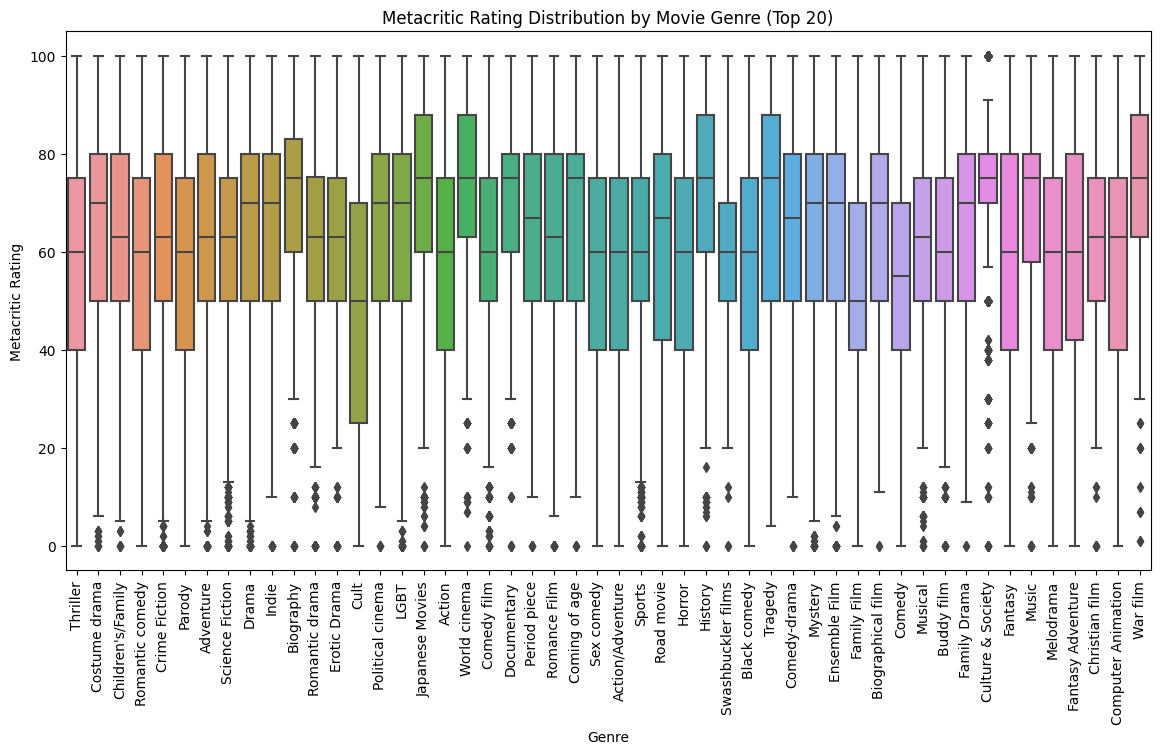

In [16]:

# Create boxplots for the top 20 genres
plt.figure(figsize=(14, 7))
sns.boxplot(x='first_genre', y='metacritic_rating', data=df_top_genres)
plt.xticks(rotation=90)
plt.title('Metacritic Rating Distribution by Movie Genre (Top 20)')
plt.xlabel('Genre')
plt.ylabel('Metacritic Rating')
plt.show()


In [17]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Ensure 'author' is of type string and handle missing values appropriately
merged_df = merged_df.dropna(subset=['author'])
merged_df['author'] = merged_df['author'].astype(str)

# Convert the 'author' column to a categorical type
merged_df['author'] = merged_df['author'].astype('category')

# Reset the index of your DataFrame to ensure it's correctly aligned
merged_df = merged_df.reset_index(drop=True)

# Check the length of the groups
print(len(merged_df['author']), merged_df.shape[0])  # These should match

# Now run the mixed-effects model
try:
    mixed_model = smf.mixedlm("metacritic_rating ~ C(first_genre)", data=merged_df, groups=merged_df['author']).fit()
    print(mixed_model.summary())
except IndexError as e:
    print("An IndexError has occurred:", e)
    print("Double-check the 'author' and 'first_genre' columns for NaNs and inconsistencies.")


133549 133549
An IndexError has occurred: index 133342 is out of bounds for axis 0 with size 133281
Double-check the 'author' and 'first_genre' columns for NaNs and inconsistencies.


In [18]:
# Perform one-hot encoding on the 'author' and 'first_genre' columns
df_encoded = pd.get_dummies(merged_df, columns=['author', 'first_genre'])

# Display the first few rows of the encoded DataFrame to check the result
print(df_encoded.head())


           publisher  metacritic_rating  metascore_x         metacritic_id  \
0        L.A. Weekly               80.0         35.0  movie/ghosts-of-mars   
1   New Times (L.A.)               80.0         35.0  movie/ghosts-of-mars   
2  Chicago Sun-Times               75.0         35.0  movie/ghosts-of-mars   
3    Chicago Tribune               63.0         35.0  movie/ghosts-of-mars   
4              Salon               60.0         35.0  movie/ghosts-of-mars   

   wikipedia_id freebase_id            name     revenue  runtime  \
0        975900   /m/03vyhn  Ghosts of Mars  14010832.0     98.0   
1        975900   /m/03vyhn  Ghosts of Mars  14010832.0     98.0   
2        975900   /m/03vyhn  Ghosts of Mars  14010832.0     98.0   
3        975900   /m/03vyhn  Ghosts of Mars  14010832.0     98.0   
4        975900   /m/03vyhn  Ghosts of Mars  14010832.0     98.0   

                            languages  ... first_genre_Time travel  \
0  {'/m/02h40lc': 'English Language'}  ...          

In [19]:
import pandas as pd
import statsmodels.formula.api as smf

# Handle missing values and convert 'publisher' to a categorical variable
new = merged_df.dropna(subset=['metacritic_rating', 'publisher', 'first_genre'])
new['publisher'] = new['publisher'].astype('category')

# Reset the index of your DataFrame to ensure it's correctly aligned
new.reset_index(drop=True, inplace=True)

# Fit the mixed-effects model using the same DataFrame for data and groups
model = smf.mixedlm("metacritic_rating ~ C(first_genre)", data=new, groups=new['publisher']).fit()

# Display the model summary to inspect the results
print(model.summary())



C:\Users\97455\AppData\Local\Temp\ipykernel_3888\3189192440.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['publisher'] = new['publisher'].astype('category')


                           Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          metacritic_rating
No. Observations:           132045           Method:                      REML             
No. Groups:                 98               Scale:                       434.4771         
Min. group size:            1                Log-Likelihood:              -588111.6121     
Max. group size:            6708             Converged:                   Yes              
Mean group size:            1347.4                                                         
-------------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------------------------------
Intercept                                      50.527    4.589 11.011 0.000  41.533  59.521
C(first_genre)[

In [20]:
#study the relationship between the genre of a movie (first_genre) and its metacritic rating, while accounting for random effects
#due to different authors (or publishers).
import pandas as pd
import statsmodels.formula.api as smf


# Resetting the index of the DataFrame
merged_df.reset_index(drop=True, inplace=True)

# Checking and handling NaN values
merged_df.dropna(subset=['metacritic_rating', 'first_genre', 'author'], inplace=True)

# Convert 'author' and 'genre' to categorical if they aren't already
merged_df['author'] = merged_df['author'].astype('category')
merged_df['first_genre'] = merged_df['first_genre'] .astype('category')

# Fit the mixed-effects linear model
model = smf.mixedlm("metacritic_rating ~ first_genre", data=merged_df, groups=merged_df['author']).fit()

# Display the model summary to inspect the results
print(model.summary())

                         Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         metacritic_rating
No. Observations:          133281          Method:                     REML             
No. Groups:                1354            Scale:                      417.4185         
Min. group size:           1               Log-Likelihood:             -592590.4173     
Max. group size:           4333            Converged:                  Yes              
Mean group size:           98.4                                                         
----------------------------------------------------------------------------------------
                                            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------------------------
Intercept                                   26.816    4.532  5.917 0.000  17.933  35.699
first_genre[T.Action]                       13.

Coefficients for Genres: Each first_genre [T.x] represents the estimated difference in metacritic rating between the genre 'x' and the reference genre. For example, first_genre [T.Action] has a coefficient of 13.152, meaning that, on average, action movies are rated 13.152 points higher than the reference genre. The p-values indicate which genres have a statistically significant difference from the reference genre. Genres with p-values less than 0.05 (like Action, Adventure, Adult, etc.) have ratings significantly different from the reference genre.

The results of the mixed linear model regression provide insights into the relationship between the genre of a movie and its metacritic rating, while accounting for random effects due to different authors. Let's interpret some key aspects of these results:

Intercept (26.816): This is the estimated average metacritic rating for the reference genre (which is the omitted category in your first_genre variable). It's statistically significant, as indicated by the p-value (P>|z| < 0.05).

Coefficients for Genres: Each first_genre[T.x] represents the estimated difference in metacritic rating between the genre 'x' and the reference genre. For example, first_genre[T.Action] has a coefficient of 13.152, meaning that, on average, action movies are rated 13.152 points higher than the reference genre. The p-values indicate which genres have a statistically significant difference from the reference genre. Genres with p-values less than 0.05 (like Action, Adventure, Adult, etc.) have ratings significantly different from the reference genre.

Group Variance (670.918): This represents the variance between different groups (authors or publishers). A higher value suggests significant variation in metacritic ratings among different authors or publishers.

No. Observations (133,281) and No. Groups (1,354): These indicate the size of your dataset and the number of unique groups (authors or publishers) considered in the model.

Method (REML): Restricted Maximum Likelihood is the method used for estimating the parameters of the model.

Scale (417.4185): This is the estimated variance of the residuals (the variation in metacritic ratings not explained by the model).

Convergence (Yes): Indicates that the algorithm used to estimate the model parameters converged, suggesting that the results are reliable.

Overall, this model allows you to understand how different genres are rated differently while accounting for random effects due to authors or publishers. The significant coefficients for specific genres suggest that certain genres tend to have higher or lower ratings compared to the reference genre. 

In [21]:
print(merged_df['first_genre'].cat.categories)


Index(['Absurdism', 'Action', 'Action Thrillers', 'Action/Adventure', 'Adult',
       'Adventure', 'Albino bias', 'Alien Film', 'Alien invasion', 'Americana',
       ...
       'Time travel', 'Tragedy', 'Tragicomedy', 'Travel', 'War film',
       'Western', 'Workplace Comedy', 'World cinema', 'Wuxia', 'Zombie Film'],
      dtype='object', length=189)


In [22]:
from scipy.stats import zscore
# A garder
# Normalize the metacritic_rating
merged_df['metacritic_rating_normalized'] = zscore(merged_df['metacritic_rating'])

# Use the normalized rating in the model
model = smf.mixedlm("metacritic_rating_normalized ~ first_genre", data=merged_df, groups=merged_df['author']).fit()
print(model.summary())

                        Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    metacritic_rating_normalized
No. Observations:      133281     Method:                REML                        
No. Groups:            1354       Scale:                 0.8272                      
Min. group size:       1          Log-Likelihood:        -178420.5892                
Max. group size:       4333       Converged:             Yes                         
Mean group size:       98.4                                                          
-------------------------------------------------------------------------------------
                                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------
Intercept                                  -1.552    0.202 -7.694 0.000 -1.948 -1.157
first_genre[T.Action]                       0.585    0.201  2.910 0.004  0.191

Group Variance (1.330): This value represents the variance in metacritic ratings attributed to the random effect of different authors. It indicates that there is variability in ratings that can be attributed to which author is reviewing the movie.

In [23]:

# Extract the results into a DataFrame
results_df = pd.DataFrame({
    'coef': model.params,
    'std err': model.bse,
    't': model.tvalues,
    'P>|t|': model.pvalues,
    '[0.025': model.conf_int()[0],
    '0.975]': model.conf_int()[1]
})

# Filter the DataFrame to only include significant results (e.g., p < 0.05)
significant_results = results_df[results_df['P>|t|'] < 0.05]

# Print the significant results
print(significant_results)

                                     coef   std err          t         P>|t|  \
Intercept                       -1.552246  0.201756  -7.693671  1.429719e-14   
first_genre[T.Action]            0.585480  0.201223   2.909603  3.618877e-03   
first_genre[T.Action/Adventure]  0.458733  0.199898   2.294838  2.174239e-02   
first_genre[T.Adult]             1.108855  0.308076   3.599285  3.190938e-04   
first_genre[T.Adventure]         0.753854  0.199228   3.783873  1.544065e-04   
...                                   ...       ...        ...           ...   
first_genre[T.Workplace Comedy]  0.715139  0.213868   3.343834  8.262905e-04   
first_genre[T.World cinema]      1.200938  0.200431   5.991776  2.075617e-09   
first_genre[T.Wuxia]             1.115618  0.211965   5.263227  1.415484e-07   
first_genre[T.Zombie Film]       0.452259  0.223086   2.027283  4.263351e-02   
Group Var                        1.607304  0.079106  20.318473  8.828014e-92   

                                   [0.0

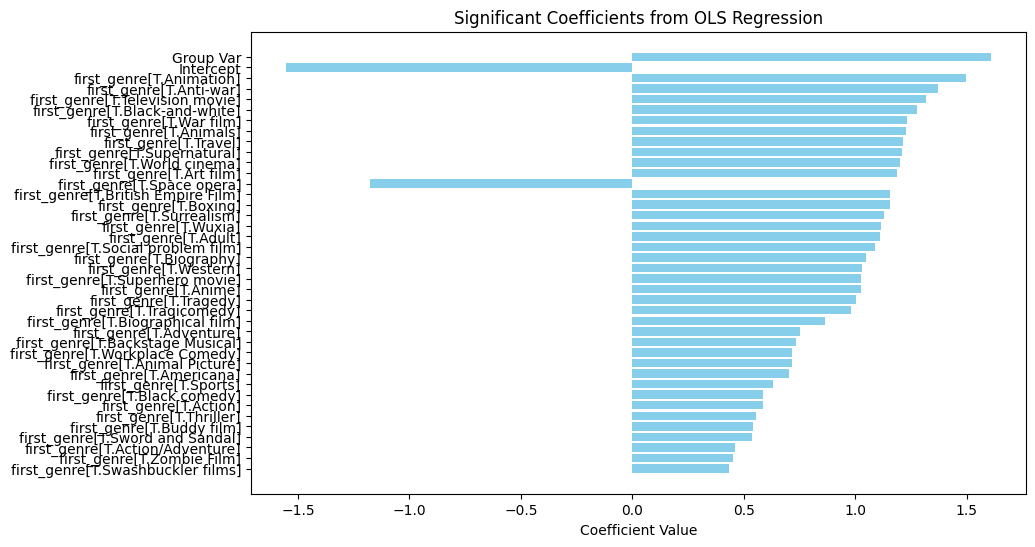

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' DataFrame has 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]' columns
# We filter the results to only include significant coefficients (p < 0.05)
top = results_df[results_df['P>|t|'] < 0.05].head(20)
bottom = results_df[results_df['P>|t|'] < 0.05].tail(20)
significant_results = pd.concat([top,bottom])
# Sort the results by the absolute value of the coefficients to get the most impactful predictors at the top
significant_results = significant_results.reindex(significant_results['coef'].abs().sort_values(ascending=False).index)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(significant_results.index, significant_results['coef'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Significant Coefficients from OLS Regression')
plt.gca().invert_yaxis()  # To have the highest values at the top of the plot
plt.show()



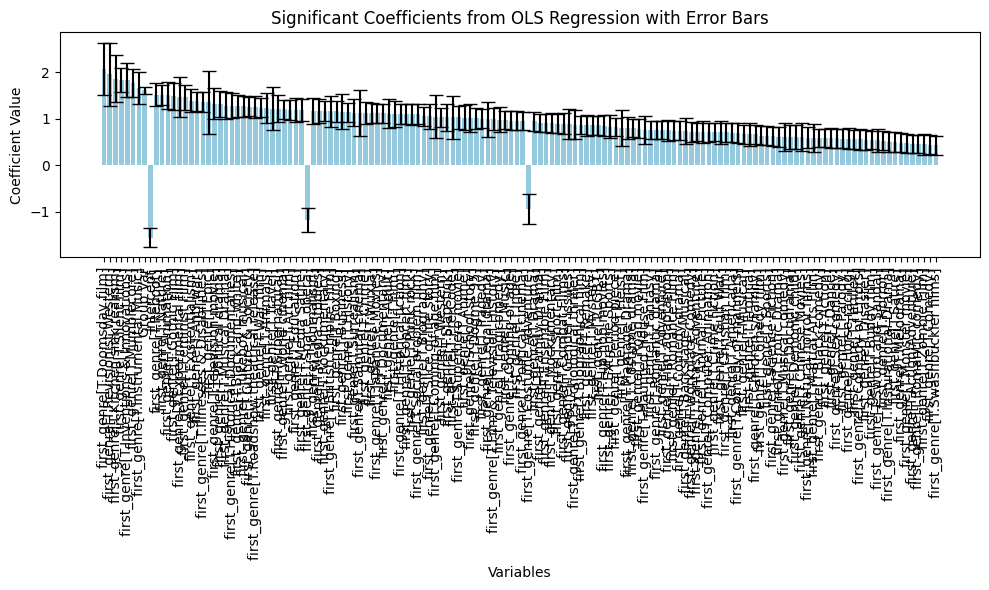

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'significant_results' is a DataFrame that contains your significant regression results
# with a 'coef' column for coefficients and 'std err' column for standard errors

# Plotting the bar plot with error bars
plt.figure(figsize=(10, 6))
sns.barplot(x=significant_results.index, y='coef', data=significant_results, color='skyblue')

# Adding error bars
# Note: The standard error bars are typically plotted at 1 standard error above and below the mean.
# If you want to represent a 95% confidence interval, you might want to use 1.96 * std err instead.
for i in range(len(significant_results)):
    plt.errorbar(i, significant_results['coef'][i], yerr=significant_results['std err'][i], capsize=5, fmt='none', color='black')

plt.xlabel('Variables')
plt.ylabel('Coefficient Value')
plt.title('Significant Coefficients from OLS Regression with Error Bars')
plt.xticks(rotation=90)  # Rotate variable names for clarity
plt.tight_layout()  # Adjust layout to fit everything
plt.show()
